In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error, mean_squared_error

from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv('data/Train.csv')
data.columns

/Users/chelsea/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [3]:
data.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68,4640,2838,3486,722
UsageBand,Low,Low,High,High,Medium
saledate,11/16/2006 0:00,3/26/2004 0:00,2/26/2004 0:00,5/19/2011 0:00,7/23/2009 0:00


In [4]:
#initial peek of data shows a large number of NaNs. Need to find out how many columns 
#have NAs
data.isnull().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    258360
UsageBand                   331486
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             137191
fiModelSeries               344217
fiModelDescriptor           329206
ProductSize                 210775
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                296764
Enclosure                      325
Forks                       209048
Pad_Type                    321991
Ride_Control                252519
Stick                       321991
Transmission                217895
Turbocharged                321991
Blade_Extension     

In [5]:
data.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
count,4.011250e+05,401125.000000,4.011250e+05,401125.000000,401125.000000,380989.000000,401125.000000,1.427650e+05
mean,1.919713e+06,31099.712848,1.217903e+06,6889.702980,134.665810,6.556040,1899.156901,3.457955e+03
std,9.090215e+05,23036.898502,4.409920e+05,6221.777842,8.962237,16.976779,291.797469,2.759026e+04
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00
25%,1.418371e+06,14500.000000,1.088697e+06,3259.000000,132.000000,1.000000,1985.000000,0.000000e+00
50%,1.639422e+06,24000.000000,1.279490e+06,4604.000000,132.000000,2.000000,1995.000000,0.000000e+00
75%,2.242707e+06,40000.000000,1.468067e+06,8724.000000,136.000000,4.000000,2000.000000,3.025000e+03
max,6.333342e+06,142000.000000,2.486330e+06,37198.000000,172.000000,99.000000,2013.000000,2.483300e+06


In [7]:
data.apply(pd.Series.nunique)

SalesID                     401125
SalePrice                      899
MachineID                   341027
ModelID                       5218
datasource                       5
auctioneerID                    30
YearMade                        72
MachineHoursCurrentMeter     15152
UsageBand                        3
saledate                      3919
fiModelDesc                   4999
fiBaseModel                   1950
fiSecondaryDesc                175
fiModelSeries                  128
fiModelDescriptor              139
ProductSize                      6
fiProductClassDesc              74
state                           53
ProductGroup                     6
ProductGroupDesc                 6
Drive_System                     4
Enclosure                        6
Forks                            2
Pad_Type                         4
Ride_Control                     3
Stick                            2
Transmission                     8
Turbocharged                     2
Blade_Extension     

In [10]:
#Pay close attention to categorical columns. if the unique values are too many, we won't 
#create dummy variables for these columns and will drop them. These value won't be a good
#predictor of 
#price becuase it has no grouping properties which can help us to identify general 
#difference. 
data_cleaned = data.drop(['SalesID', 'MachineID', 'ModelID', 'fiProductClassDesc'], axis = 1)
data_cleaned.head()

,SalePrice,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,66000,121,3.0,2004,68.0,Low,11/16/2006 0:00,521D,521,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,57000,121,3.0,1996,4640.0,Low,3/26/2004 0:00,950FII,950,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,10000,121,3.0,2001,2838.0,High,2/26/2004 0:00,226,226,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,38500,121,3.0,2001,3486.0,High,5/19/2011 0:00,PC120-6E,PC120,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11000,121,3.0,2007,722.0,Medium,7/23/2009 0:00,S175,S175,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
#we need to know what data is in the columns with NAs and fill NAs

def find_unique(data, column):
    return column, data[column].unique()
    
categories = ['auctioneerID',
        'UsageBand', 
       'fiBaseModel',  'fiModelSeries', 'ProductSize',
       'state', 'ProductGroup',  'Drive_System',
       'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control', 'Stick',
       'Transmission', 'Turbocharged', 'Blade_Extension', 'Blade_Width',
       'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics', 'Pushblock',
       'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size', 'Coupler',
       'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls']
result = []
for column in categories:
    result.append(find_unique(data, column))

In [32]:
pd.DataFrame(result)

,0,1
0,auctioneerID,"[3.0, 1.0, 2.0, 11.0, 4.0, 7.0, 99.0, 6.0, 5.0..."
1,UsageBand,"[Low, High, Medium, nan]"
2,fiBaseModel,"[521, 950, 226, PC120, S175, 310, 790, 416, 43..."
3,fiModelSeries,"[nan, II, -6E, LC, -5, III, -1, 5, -2, 1, #NAM..."
4,ProductSize,"[nan, Medium, Small, Large / Medium, Mini, Lar..."
5,state,"[Alabama, North Carolina, New York, Texas, Ari..."
6,ProductGroup,"[WL, SSL, TEX, BL, TTT, MG]"
7,Drive_System,"[nan, Four Wheel Drive, Two Wheel Drive, No, A..."
8,Enclosure,"[EROPS w AC, OROPS, EROPS, nan, EROPS AC, NO R..."
9,Forks,"[None or Unspecified, nan, Yes]"


In [34]:
#fill all NAs based on characteristics of that column
def fillNA(data, column_name, fill):
    data[column_name] = data[column_name].fillna(fill)
    
data = data_cleaned
default = 'None or Unspecified'

fillNA(data, 'MachineHoursCurrentMeter', 0)
fillNA(data, 'UsageBand', 'Low')
fillNA(data, 'fiSecondaryDesc', 'DEFAULT')
fillNA(data, 'fiModelSeries', 'DEFAULT')
fillNA(data, 'fiModelDescriptor', 'DEFAULT')
fillNA(data, 'Drive_System', 'No')
fillNA(data, 'Enclosure', default)
fillNA(data, 'Forks', default)
fillNA(data, 'Pad_Type', default)
fillNA(data, 'Ride_Control', default)
fillNA(data, 'Stick', 'Standard')
fillNA(data, 'Transmission', default)
fillNA(data, 'Turbocharged', default)
fillNA(data, 'Blade_Extension', default)
fillNA(data, 'Blade_Width', default)
fillNA(data, 'Enclosure_Type', default)
fillNA(data, 'Engine_Horsepower', 'No')
fillNA(data, 'Hydraulics', 'Standard')
fillNA(data, 'Pushblock', default)
fillNA(data, 'Ripper', default)
fillNA(data, 'Tip_Control', default)
fillNA(data, 'Tire_Size', default)
fillNA(data, 'Coupler', default)
fillNA(data, 'Coupler_System', default)
fillNA(data, 'Grouser_Tracks', default)
fillNA(data, 'Hydraulics_Flow', default)
fillNA(data, 'Track_Type', default)
fillNA(data, 'Undercarriage_Pad_Width', default)
fillNA(data, 'Stick_Length', default)
fillNA(data, 'Thumb', default)
fillNA(data, 'Pattern_Changer', default)
fillNA(data, 'Grouser_Type', default)
fillNA(data, 'Backhoe_Mounting', default)
fillNA(data, 'Blade_Type', default)
fillNA(data, 'Travel_Controls', default)
fillNA(data, 'Differential_Type', default)
fillNA(data, 'Steering_Controls', "No")
fillNA(data, 'Scarifier', default)
fillNA(data, 'ProductSize', default)
fillNA(data, 'auctioneerID', -1)

In [35]:
#sale date is useful in calculating the age of the machine at time of sale, so we extract 
#year of this column and make a new column based on (sale year - yearMade)
data_cleaned['saledate'] = pd.to_datetime(data_cleaned['saledate'])

In [36]:
data_cleaned['sale_year'] = pd.DataFrame(data_cleaned['saledate'].apply(lambda x: x.year))

In [37]:
data_cleaned['age'] = data_cleaned['sale_year'] - data_cleaned['YearMade']

In [42]:
data_cleaned = data_cleaned.drop(['sale_year'], axis = 1)
data_cleaned.head()

,SalePrice,datasource,auctioneerID,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,...,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,age
0,66000,121,3.0,68.0,Low,521D,521,D,DEFAULT,DEFAULT,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Standard,Conventional,2
1,57000,121,3.0,4640.0,Low,950FII,950,F,II,DEFAULT,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Standard,Conventional,8
2,10000,121,3.0,2838.0,High,226,226,DEFAULT,DEFAULT,DEFAULT,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,no,3
3,38500,121,3.0,3486.0,High,PC120-6E,PC120,DEFAULT,-6E,DEFAULT,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,no,10
4,11000,121,3.0,722.0,Medium,S175,S175,DEFAULT,DEFAULT,DEFAULT,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,no,2


In [48]:
#some categorial data don't contribute to prices intuitively, like datasource, we won't give them
#dummy variables
#generate dummy variables based on the categorical features
category = ['auctioneerID',
        'UsageBand', 
       'fiBaseModel',  'fiModelSeries', 'ProductSize',
       'state', 'ProductGroup',  'Drive_System',
       'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control', 'Stick',
       'Transmission', 'Turbocharged', 'Blade_Extension', 'Blade_Width',
       'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics', 'Pushblock',
       'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size', 'Coupler',
       'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls']
temp_result = []
for cat in category:
    temp = pd.get_dummies(data_cleaned[cat])
    temp.columns = ["{}_{}".format(cat, x) for x in temp.columns]
    temp_result.append(temp)
    
other_features = ['age',
       'MachineHoursCurrentMeter']
temp_result.append(data_cleaned[other_features])
data_transformed_X = pd.concat(temp_result, axis = 1)

In [49]:
data_transformed.shape

(401125, 2366)

In [214]:
#define a function that can be re-used to test different models
def get_model_error(model, X, y, test_size):
    trainX, testX, trainY, testY = train_test_split(X, y, test_size = test_size)
    model.fit(trainX, trainY)
    pred = model.predict(testX)
    predX = model.predict(trainX)
    print(np.sqrt(mean_squared_log_error(trainY, predX)),
    np.sqrt(mean_squared_log_error(testY, pred)))
    return np.sqrt(mean_squared_log_error(trainY, predX)), np.sqrt(mean_squared_log_error(testY, pred))

In [60]:
#to get a benchmark performance measure，linear model will be used
#with over 2000 features, co-linearity needs to be adjusted by L2 regularization
#it would also be ideal to have L1 regularization to select more important features
#ElasticNet model provides both regularization

X = data_transformed_X
y = data_cleaned['SalePrice']

model_en = ElasticNet(alpha = 5.0, l1_ratio = 0.95)
get_model_error(model_en, X, y, 0.3)

0.5483340244829791 0.5510306355065349


In [62]:
# root log error is 0.55, which means the predicted values are about 50% different from 
# the truth.
#After investigation, linear model under-performs random forest, which indicates linearity
#is not strong

X = data_transformed_X
y = data_cleaned['SalePrice']

model_rf = RandomForestRegressor(n_jobs = -1)
get_model_error(model_rf, X, y, 0.3)


0.13812492364226647 0.27391658003999864


In [91]:
#in the model above, over 2000 features were used. The training error is a lot lower 
#than the testing error, which flags potential over-fitting issues. Feature number needs to
#be reduced
len(X.columns)

2366

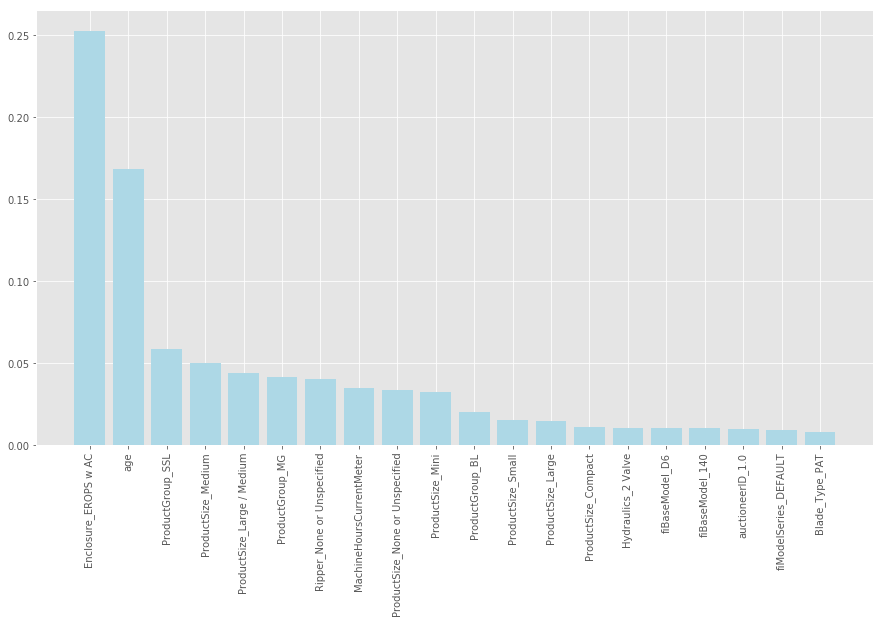

In [200]:
#plotting the top 20 features sorted by importance
#It shows that most of the features have importance of less than 0.05. 

features = X.columns
random_forest_1_importances = model_rf.feature_importances_
#sort the importances and return index of corresponding importance
indices = np.argsort(random_forest_1_importances)[::-1][:20]
columns = [features[x] for x in indices]

fig, ax = plt.subplots(1, figsize = (15, 8))
ax.bar(range(len(indices)), random_forest_1_importances[indices], color = 'lightblue')
#set positions of bars on x-axis
ax.set_xticks(range(len(indices)))
#set labels of bars
ax.set_xticklabels(features[indices], rotation=90)
plt.show()

In [176]:
#Let's only select features over importance of 0.05, Age, Enclosure_EROPS w AC, and ProductGroup_SSL

#Age is the only numeric variable. Let's graph it to take a closer look

In [185]:
#define a function to draw graphs showing distribution 
def drawBoxPlot(data, category_name, y_name, color, labels = None):
    data_copy = data.copy(deep = True)
    fig, ax = plt.subplots(figsize=(20, 35))
    data_copy[category_name] = data_copy[category_name].astype('category')
    data_copy.boxplot([y_name], by = category_name, ax = ax)
    fig.suptitle("")
    ax.set_title("Sale Price by {}".format(category_name))
    categories = data_copy[category_name].cat.categories
    cat_index = dict(zip(categories, range(1, len(categories) + 1)))

    data_copy['cat_idx'] = data_copy[category_name].replace(cat_index)
    data_copy['cat_random_idx'] = data_copy['cat_idx'].apply(lambda x: x + np.random.uniform(-0.3, 0.3))
    ax.scatter(data_copy['cat_random_idx'], 
               data_copy[y_name], color = color, alpha = 0.2, s=10)
    means = data_copy.groupby(category_name)[y_name].median()
    means.index = [cat_index[x] for x in means.index]
    means.plot(ax = ax, color = 'b', alpha = 0.3)
    if labels is not None:
        ax.set_xticklabels(labels)
    

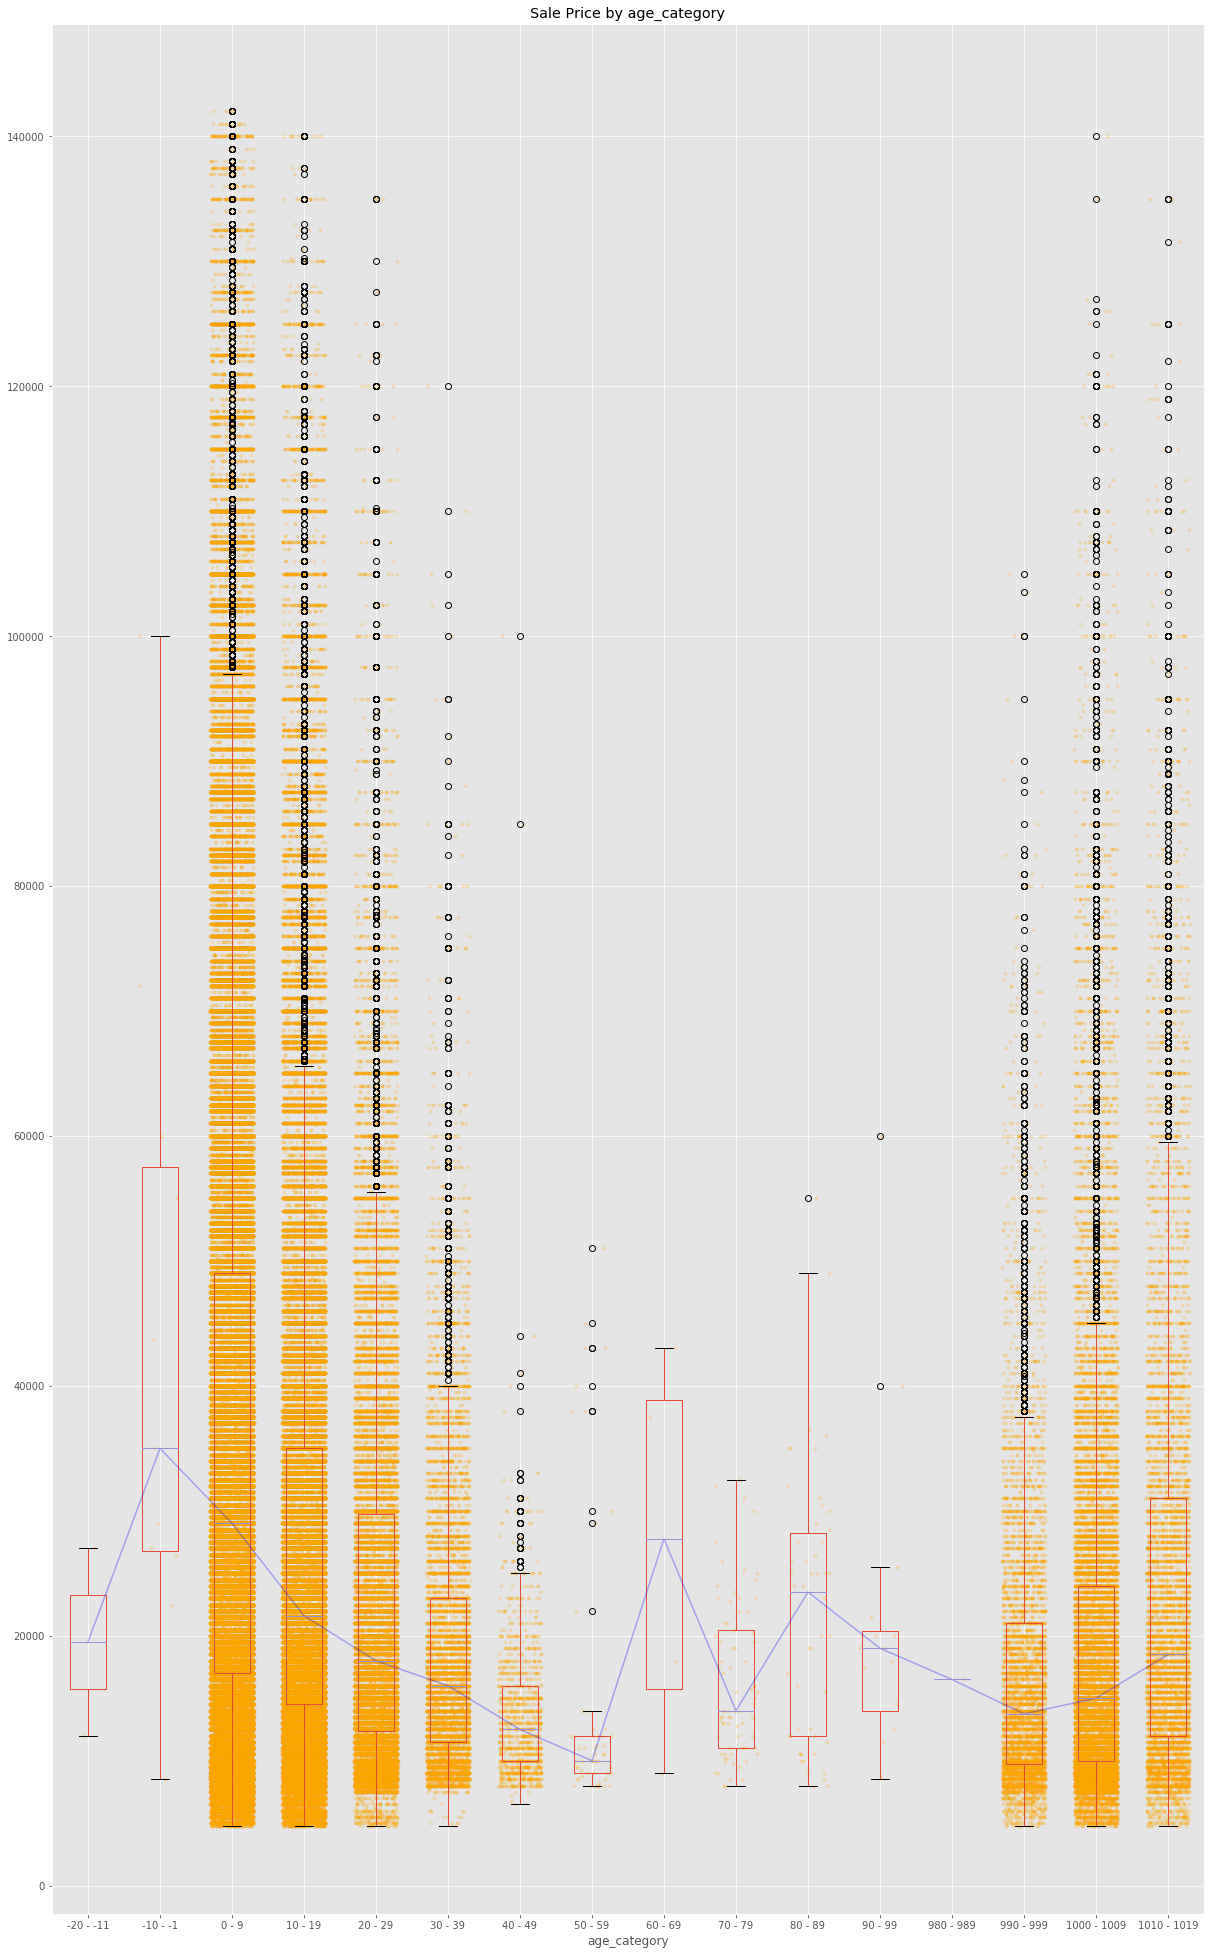

In [232]:
data_copy = data_cleaned.copy(deep = True)
# group years by every 10 days
def ageCat(x):
    temp = x // 10 * 10
    return temp
def ageCatName(x):
    return "{} - {}".format(x, x + 9)

data_copy['age_category'] = data_copy['age'].apply(ageCat)
categories = [ageCatName(x) for x in np.sort(data_copy['age_category'].unique())]

drawBoxPlot(data_copy, "age_category", "SalePrice", "orange", categories)
#plt.savefig('images/Sales_Price_By_Age.png')

In [224]:
#It's noticed that there were ages smaller than 0 and ages over 1000, which probably resulted
#from incorrect data entry or were placed for unknown values
#Let's remove any ages below 0 and above 100 for age
#Also add the other feature catagories decided earlier and re-run the random forest model

selected_rows = (data_transformed_X['age'] > 0) & (data_transformed_X['age'] <= 100)
selected_columns = ['age'] + [x for x in data_transformed_X.columns if ('Enclosure_' in x) or ('ProductGroup_' in x)]

X = data_transformed_X[selected_rows][selected_columns]
y = data_cleaned[selected_rows]['SalePrice']

model_rf = RandomForestRegressor(n_jobs = 100)
get_model_error(model_rf, X, y, 0.3)

0.45706536566921785 0.4573365980934957


(0.45706536566921785, 0.4573365980934957)

In [225]:
# The error increases in the approach above. So let's just use the top 50 features ranked
#by importance in the previous random forest model and only use rows with age within 0-100 years

selected_rows = (data_transformed_X['age'] > 0) & (data_transformed_X['age'] <= 100)

indices_rf2 = np.argsort(random_forest_1_importances)[::-1][:50]
columns_rf2 = [features[x] for x in indices_rf2]
X = data_transformed_X[selected_rows][columns_rf2]
y = data_cleaned[selected_rows]['SalePrice']


model_rf = RandomForestRegressor(n_jobs = 100)
get_model_error(model_rf, X, y, 0.3)

0.2573169520075291 0.3247003481773879


(0.2573169520075291, 0.3247003481773879)

In [230]:
# Over 2000 features are reduced to 50, while the error didn't increases much
# error for training is not significantly better than testing. Overfitting is not present
#Random forest is the ideal model so far, but its parameters need to be tuned by grid search

grids = {"criterion": ['mse', 'mae'], "max_depth": [3, None], 
        "min_samples_split": [2, 3], 
         'max_features': ['sqrt', 'log2', 'auto'], 
        }


gs = GridSearchCV(RandomForestRegressor(n_estimators = 50, n_jobs = -1),
                  param_grid = grids,
                  scoring='neg_mean_squared_log_error', cv = 5, return_train_score=True)


In [231]:
# The default parameters had a lower error rate. That is the final model selected for 
#predicting tractor prices
selected_rows = (data_transformed_X['age'] > 0) & (data_transformed_X['age'] <= 100)

indices_rf2 = np.argsort(random_forest_1_importances)[::-1][:50]
columns_rf2 = [features[x] for x in indices_rf2]
X = data_transformed_X[selected_rows][columns_rf2]
y = data_cleaned[selected_rows]['SalePrice']
randomIndex = np.random.choice(range(X.shape[0]), 10000)
sampleX = X.iloc[randomIndex, :]
sampleY = y.iloc[randomIndex]

get_model_error(gs, sampleX, sampleY, 0.3)

0.19863128667395438 0.3453570927755477


(0.19863128667395438, 0.3453570927755477)